In [2]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
import pandas
import cv2
import os
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import keras
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras import *
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [4]:
dataset_dir=od.download(
    "https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kalyanpoluri
Your Kaggle Key: ··········


100%|██████████| 121M/121M [00:00<00:00, 141MB/s]


In [5]:
dataset_dir="facial-emotion-expressions/images/images/train/"
val_dir = "facial-emotion-expressions/images/images/validation/"

In [6]:
Categories = ['angry',  'disgust',  'fear',  'happy'  ,'neutral', 'sad','surprise']

In [14]:
data = []
labels = []
val_data=[]
val_labels=[]
for i in Categories:
  path =  dataset_dir+i+'/'
  for j in os.listdir(path):
    im = cv2.imread(path+j)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    data.append(im)
    labels.append(i)

for i in Categories:
  path =  val_dir+i+'/'
  for j in os.listdir(path):
    im = cv2.imread(path+j)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    val_data.append(im)
    val_labels.append(i)   

In [15]:
data = np.array(data)
labels = np.array(labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(labels)
labels = label_encoder.transform(labels)
label_encoder = preprocessing.LabelEncoder().fit(val_labels)
val_labels = label_encoder.transform(val_labels)

In [20]:
image_shape = (48,48,1)

model = Sequential()

model.add(Conv2D(100, 3, activation='relu', padding='same', input_shape=(48,48,1)))
model.add(Conv2D(200, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(200, 3, activation='relu', padding='same'))
model.add(Conv2D(300, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(400, 3, activation='relu', padding='same'))
model.add(Conv2D(500, 3, activation='relu', padding='same'))
model.add(Conv2D(600, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 100)       1000      
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 200)       180200    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 200)      0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 200)      800       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 200)       360200    
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 300)      

In [21]:
print(data.shape)
print(labels.shape)

print(val_data.shape)
print(val_labels.shape)

(28821, 48, 48)
(28821,)
(7066, 48, 48)
(7066,)


In [23]:
from tensorflow.keras.optimizers import Adam 

model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
history = model.fit(data,
                    labels ,
                    validation_data=(val_data,val_labels),
                    epochs=20,
                    batch_size=16)
                    
                    

Epoch 1/20
1802/1802 [==============================] - 71s 36ms/step - loss: 1.6775 - accuracy: 0.3364 - val_loss: 1.5182 - val_accuracy: 0.4046
Epoch 2/20
1802/1802 [==============================] - 64s 36ms/step - loss: 1.3462 - accuracy: 0.4806 - val_loss: 1.4858 - val_accuracy: 0.4145
Epoch 3/20
1802/1802 [==============================] - 65s 36ms/step - loss: 1.2202 - accuracy: 0.5337 - val_loss: 1.3592 - val_accuracy: 0.4676
Epoch 4/20
1802/1802 [==============================] - 65s 36ms/step - loss: 1.1315 - accuracy: 0.5706 - val_loss: 1.1612 - val_accuracy: 0.5655
Epoch 5/20
1802/1802 [==============================] - 65s 36ms/step - loss: 1.0531 - accuracy: 0.5983 - val_loss: 1.1008 - val_accuracy: 0.5931
Epoch 6/20
1802/1802 [==============================] - 65s 36ms/step - loss: 0.9747 - accuracy: 0.6307 - val_loss: 1.1190 - val_accuracy: 0.5860
Epoch 7/20
1802/1802 [==============================] - 66s 37ms/step - loss: 0.8777 - accuracy: 0.6719 - val_loss: 1.1315 -

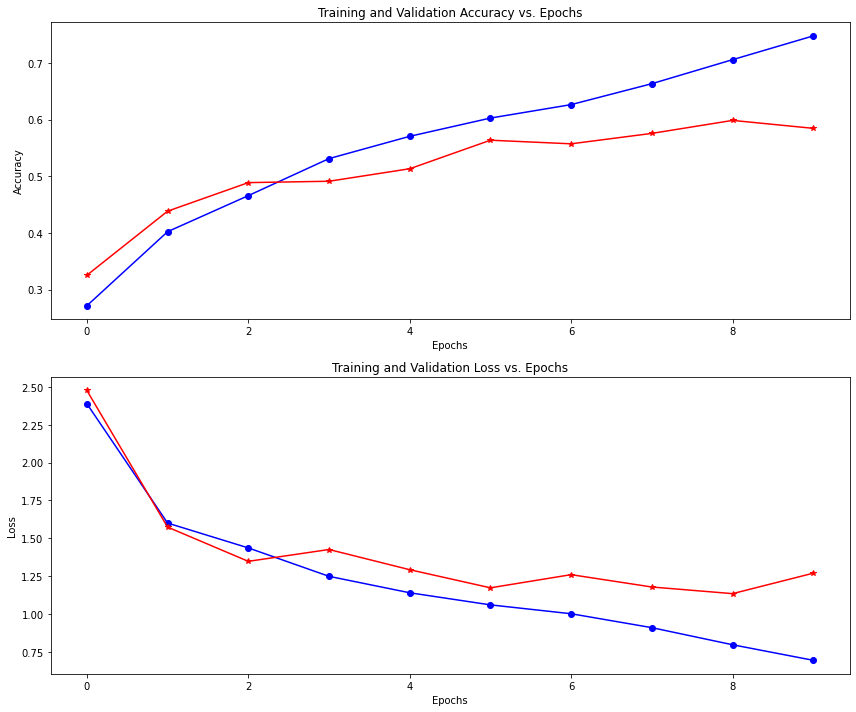

In [ ]:
import matplotlib.pyplot as plt

figure, graph = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

graph[0].set_title('Training and Validation Accuracy vs. Epochs')
graph[0].plot(history.history['accuracy'], 'o-', color='blue', label='Train Accuracy')
graph[0].plot(history.history['val_accuracy'], '*-', color='red', label='Validation Accuracy')
graph[0].set_xlabel('Epochs')
graph[0].set_ylabel('Accuracy')

graph[1].set_title('Training and Validation Loss vs. Epochs')
graph[1].plot(history.history['loss'], 'o-', color='blue', label='Training Loss')
graph[1].plot(history.history['val_loss'], '*-', color='red', label='Validation Loss')
graph[1].set_xlabel('Epochs')
graph[1].set_ylabel('Loss')

plt.tight_layout()